In [ ]:
pip install statsmodels


In [ ]:
!pip install calmap


In [ ]:
import pandas as pd
import numpy as np
import calmap
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data Research/Gsheet Big Data Research - 2012 - 2023 Yearly Data.csv')

print(df)


    Year  Total Cases  Average Cases per Day Highest Cases by Month  \
0   2012        82757                    227                    NaN   
1   2013        86565                    237                    NaN   
2   2014        90258                    247                    NaN   
3   2015        95615                    262                    NaN   
4   2016       109322                    299              September   
5   2017       110025                    301                   June   
6   2018       116906                    320                October   
7   2019       121771                    334                October   
8   2020        65032                    178               February   
9   2021        58447                    160               December   
10  2022        71891                    197               November   
11  2023        85954                    236                 August   

   Lowest Cases by Month Highest Cases by ROAD Highest Cases by Time (Hour) 

**Exploratory Data Analysis**

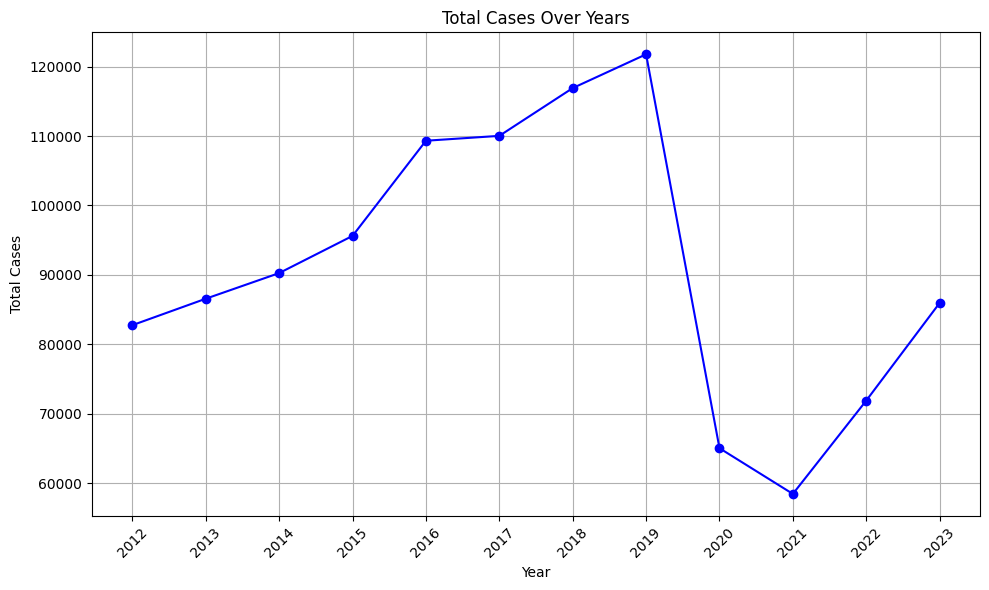

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total Cases'], marker='o', color='b', linestyle='-')
plt.title('Total Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.xticks(df['Year'], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
result = adfuller(df['Total Cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


ADF Statistic: 0.8451266910825956
p-value: 0.9923307575808353
Critical Values:
1%: -4.9386902332361515
5%: -3.477582857142857
10%: -2.8438679591836733


ADF Statistic: Because the DF statistic is -5.0304, the null hypothesis is rejected.

p-value: significantly less than 0.05

Critical Values: All the critical values are less than the ADF statistic

The time series is stationary.

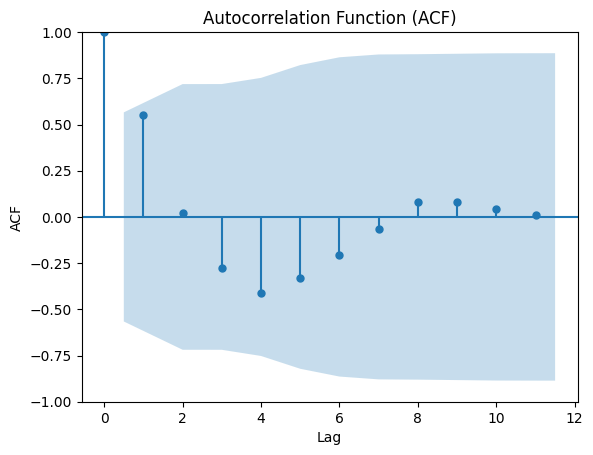

In [ ]:
plot_acf(df['Total Cases'].values, lags=len(df)-1)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

**Arima Model**

In [ ]:
p = 1
d = 0
q = 0

model = ARIMA(df['Total Cases'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -133.476
Date:                Mon, 12 Aug 2024   AIC                            272.952
Time:                        14:00:25   BIC                            274.407
Sample:                             0   HQIC                           272.414
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.121e+04   1.46e+04      6.241      0.000    6.26e+04     1.2e+05
ar.L1          0.5215      0.265      1.971      0.049       0.003       1.040
sigma2      2.793e+08      0.541   5.17e+08      0.0

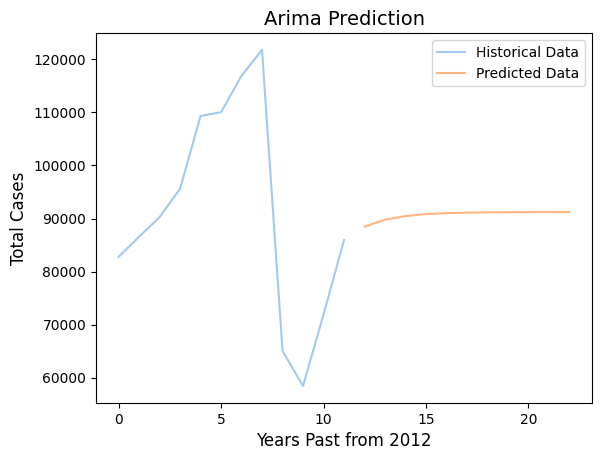

In [ ]:
pastel_palette = sns.color_palette("pastel")
model = ARIMA(df['Total Cases'], order=(p, d, q))
model_fit = model.fit()

forecast_steps = 11
forecast = model_fit.forecast(steps=forecast_steps)

plt.plot(df.index, df['Total Cases'], label='Historical Data', color=pastel_palette[0])
plt.plot(forecast.index, forecast, label='Predicted Data', color=pastel_palette[1])
plt.title('Arima Prediction', fontsize=14)
plt.xlabel('Years Past from 2012', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)

plt.legend()
plt.show()



In [ ]:
print(model_fit.forecast(steps=forecast_steps))

12    88469.730660
13    89781.771501
14    90466.046330
15    90822.919399
16    91009.041089
17    91106.110009
18    91156.734820
19    91183.137415
20    91196.907285
21    91204.088750
22    91207.834133
Name: predicted_mean, dtype: float64


In [ ]:
mse = mean_squared_error(df['Total Cases'], forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(df['Total Cases'], forecast)
print("Mean Absolute Error:", mae)
aic = model_fit.aic
print("AIC:", aic)


ValueError: Found input variables with inconsistent numbers of samples: [12, 11]

**Regression Analysis**

Part 1. District (City)

A. EDSA

In [ ]:
edsa = pd.read_csv('/content/drive/MyDrive/Big Data Research/edsa.csv')
print(edsa)

      Year         District (City)  Damage to Property  Fatal  Non - Fatal  \
0   2017.0       Central (Quezon)                 5651      8          379   
1      NaN  Eastern (Mandaluyong)                 2076      1          114   
2      NaN     Eastern (San Juan)                  131      1            8   
3      NaN    Northern (Caloocan)                  415      3           37   
4      NaN      Southern (Makati)                 2464      4          121   
5      NaN        Southern (Pasay)                1103      2          117   
6   2018.0       Central (Quezon)                 7067     11          572   
7      NaN  Eastern (Mandaluyong)                 3439      5          205   
8      NaN     Eastern (San Juan)                  202      0           11   
9      NaN    Northern (Caloocan)                  420      0           59   
10     NaN      Southern (Makati)                 3722      4          160   
11     NaN        Southern (Pasay)                1236      1   

In [ ]:
print(edsa.dtypes)

Year                                   float64
District (City)                         object
Damage to Property                       int64
Fatal                                    int64
Non - Fatal                              int64
Grand Total                              int64
Damage to Property Rate                float64
Fatality Rate                          float64
Non-Fatal Injury Rate                  float64
Percentage from Yearly Total Cases     float64
Yearly Damage to Property Rate         float64
Yearly Fatality Rate                   float64
Yearly Non-Fatal Injury Rate           float64
Yearly Total                             int64
Latitude                               float64
Longitude                              float64
dtype: object


In [ ]:
import statsmodels.api as sm
y = edsa['Yearly Total ']
X = edsa[['Damage to Property Rate', 'Fatality Rate', 'Non-Fatal Injury Rate', 'Percentage from Yearly Total Cases ', 'Yearly Fatality Rate', 'Yearly Non-Fatal Injury Rate']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          Yearly Total    R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     48.01
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           9.27e-14
Time:                        14:01:08   Log-Likelihood:                -311.18
No. Observations:                  36   AIC:                             636.4
Df Residuals:                      29   BIC:                             647.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

B. C-5

In [ ]:
c5 = pd.read_csv('/content/drive/MyDrive/Big Data Research/c5.csv')
print(c5)

      Year         District (City)  Damage to Property  Fatal  Non - Fatal  \
0   2017.0        Central (Quezon)                1718      5          189   
1      NaN        Eastern (Pasig)                 1506      6           93   
2      NaN  Northern (Valenzuela)                   17      0            8   
3      NaN   Southern (Las Piñas)                   91      1           30   
4      NaN      Southern (Makati)                  410      0           22   
5      NaN   Southern (Parañaque)                  141      3           67   
6      NaN       Southern (Pasay)                   13      0            8   
7      NaN       Southern (Taguig)                1297      8          161   
8   2018.0        Central (Quezon)                3297      7          391   
9      NaN        Eastern (Pasig)                 1832      3          127   
10     NaN  Northern (Valenzuela)                   19      1            9   
11     NaN   Southern (Las Piñas)                  105      0   

In [ ]:
import statsmodels.api as sm
a = c5['Yearly Total ']
B = c5[['Damage to Property Rate', 'Fatality Rate', 'Non-Fatal Injury Rate', 'Percantage from Yearly Total Cases ', 'Yearly Fatality Rate', 'Yearly Non-Fatal Injury Rate']]
B = sm.add_constant(B)
model = sm.OLS(a, B).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Yearly Total    R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.437
Date:                Fri, 05 Apr 2024   Prob (F-statistic):            0.00152
Time:                        02:41:37   Log-Likelihood:                -401.74
No. Observations:                  48   AIC:                             817.5
Df Residuals:                      41   BIC:                             830.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
months = pd.read_csv('/content/drive/MyDrive/Big Data Research/7months.csv')
print(months)

    Year      Month  Monthly Cases  Percentage from Yearly Total Cases  \
0   2019    January           9412                               0.077   
1   2019   February           9462                               0.078   
2   2019     March           10750                               0.088   
3   2019     April            9167                               0.075   
4   2019        May           9879                               0.081   
5   2019       June          10051                               0.083   
6   2019       July          10667                               0.088   
7   2019     August          10391                               0.085   
8   2019  September          10578                               0.087   
9   2019    October          10907                               0.090   
10  2019  November           10138                               0.083   
11  2019   December          10369                               0.085   
12  2020    January           7283    

In [ ]:
pivot_months = months.pivot_table(index='Month', columns='Year', values='Percentage from Yearly Total Cases')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_months, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Percentage from Yearly Total Cases ')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

NameError: name 'months' is not defined

In [ ]:
commonwealth = pd.read_csv('/content/drive/MyDrive/Big Data Research/commonwealth.csv')
print(commonwealth)

    Year      Month  Damage to Property  Fatal  Non - Fatal  Grand Total  \
0   2019    January                 317      3           84          404   
1   2019   February                 308      2           95          405   
2   2019     March                  325      0           85          410   
3   2019     April                  248      3           71          322   
4   2019        May                 268      0           63          331   
5   2019       June                 295      3           68          366   
6   2019       July                 376      1          103          480   
7   2019     August                 380      2           88          470   
8   2019  September                 411      3           92          506   
9   2019    October                 356      2           77          435   
10  2019  November                  354      3           65          422   
11  2019   December                 360      1           86          447   
12  2020    

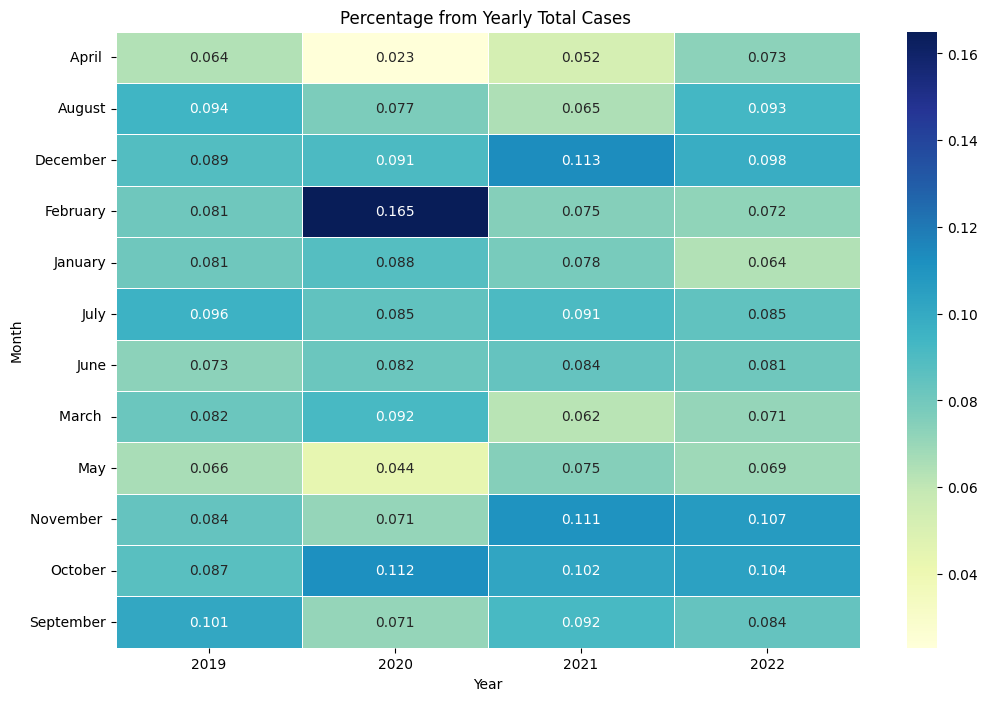

In [ ]:
pivot_commonwealth = commonwealth.pivot_table(index='Month', columns='Year', values='Percentage from Yearly Total Cases ')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_commonwealth, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Percentage from Yearly Total Cases ')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [ ]:
qave = pd.read_csv('/content/drive/MyDrive/Big Data Research/qave.csv')
print(qave)

    Year      Month  Damage to Property  Fatal  Non - Fatal  Grand Total  \
0   2019    January                 207      0           27          234   
1   2019   February                 187      0           32          219   
2   2019     March                  237      2           36          275   
3   2019     April                  163      0           32          195   
4   2019        May                 200      0           22          222   
5   2019       June                 180      2           27          209   
6   2019       July                 189      0           29          218   
7   2019     August                 186      1           18          205   
8   2019  September                 187      1           20          208   
9   2019    October                 213      0           36          249   
10  2019  November                  180      2           19          201   
11  2019   December                 159      0           42          201   
12  2020    

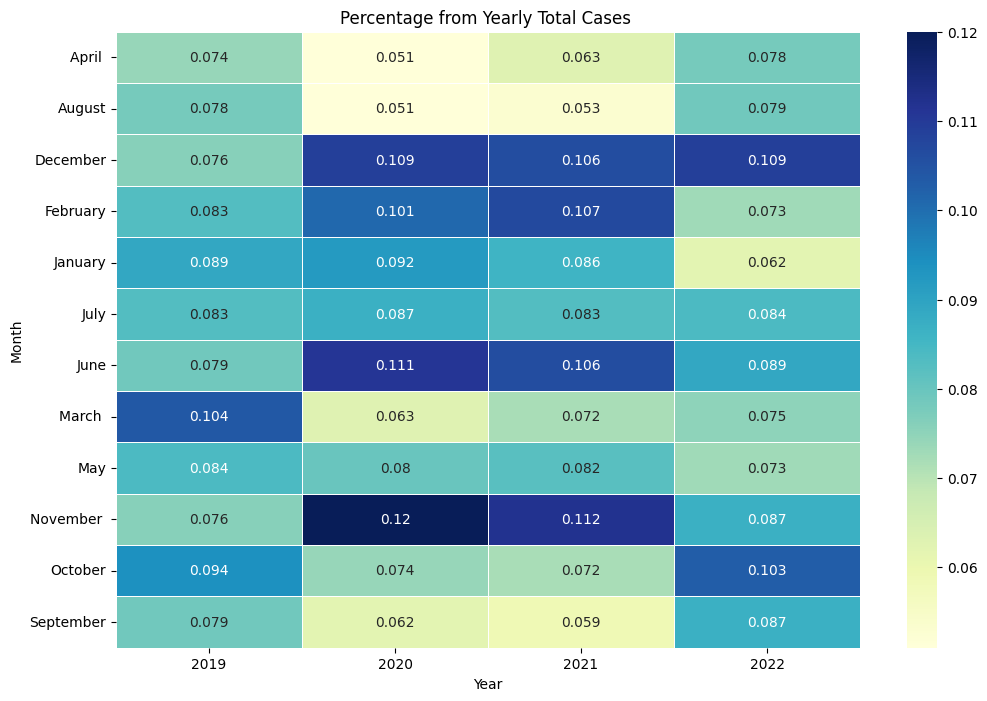

In [ ]:
pivot_qave = qave.pivot_table(index='Month', columns='Year', values='Percentage from Yearly Total Cases ')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_qave, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Percentage from Yearly Total Cases ')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Big Data Research/MajorRoads.csv'